In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

/Users/leyangzhang/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [32]:
event_win = 50
est_win = 100

In [33]:
dummy = pd.read_excel('dummy.xlsx')
lb = pd.get_dummies(dummy['Listing board'])
lb.columns = ['GEM','Main','SME']
indu = pd.get_dummies(dummy['Industry'])
indu.columns = ['Others','Industrial','Material','Healthcare','IT']
dummy = pd.concat((dummy, lb, indu), axis=1)
dummy = dummy.drop([7])
dummy

,Code,Name,Non-SOE,Listing board,Industry,GEM,Main,SME,Others,Industrial,Material,Healthcare,IT
0,603839.SH,安正时尚,1,1,0,0,1,0,1,0,0,0,0
1,601727.SH,上海电气,0,1,1,0,1,0,0,1,0,0,0
2,601390.SH,中国中铁,0,1,1,0,1,0,0,1,0,0,0
3,601186.SH,中国铁建,0,1,1,0,1,0,0,1,0,0,0
4,600739.SH,辽宁成大,0,1,0,0,1,0,1,0,0,0,0
5,600704.SH,物产中大,0,1,1,0,1,0,0,1,0,0,0
6,600549.SH,厦门钨业,0,1,2,0,1,0,0,0,1,0,0
8,600522.SH,中天科技,1,1,4,0,1,0,0,0,0,0,1
9,600380.SH,健康元,1,1,3,0,1,0,0,0,0,1,0
10,600332.SH,白云山,0,1,3,0,1,0,0,0,0,1,0


In [34]:
event_data = pd.read_csv('event_date.csv')
event_data['date'] = pd.to_datetime(event_data['date'])
event_data = event_data.set_index('tickcode')
event_data = event_data.drop(['H'])
event_data

,ticknum,tickname,date
tickcode,,,
A,603839.SH,安正时尚,2020-06-02
B,601727.SH,上海电气,2020-01-07
C,601390.SH,中国中铁,2020-06-02
D,601186.SH,中国铁建,2019-12-20
E,600739.SH,辽宁成大,2020-04-03
F,600704.SH,物产中大,2020-07-01
G,600549.SH,厦门钨业,2020-06-02
I,600522.SH,中天科技,2020-09-28
J,600380.SH,健康元,2020-09-28


In [35]:
stocklist = list(event_data.index)
stocknamelist = list(event_data['tickname '])

In [36]:
ff_factors = pd.read_csv('STK_MKT_THRFACDAY.csv')
ff_factors['date'] = pd.to_datetime(ff_factors['date'])
ff_factors = ff_factors.set_index('date')
## 综合A股和创业板
ff_factors = ff_factors[ff_factors['MarkettypeID'] == 'P9709']
# ff_factors

In [37]:
stock = pd.read_csv('stock.csv')
stock['date'] = pd.to_datetime(stock['date'])
stock = stock.set_index('date')
stock = stock.pct_change().dropna()
# stock

In [38]:
stock

,A,B,C,D,E,F,G,H,I,J,...,OO,PP,QQ,RR,SS,TT,UU,VV,WW,XX
date,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.004812,0.010101,0.007278,0.004669,0.017699,0.006652,0.005068,-0.038031,-0.037530,-0.025994,...,-0.004292,0.003527,-0.003135,-0.012816,0.011494,0.005128,-0.011349,-0.006211,-0.006586,0.000592
2019-01-04,0.007737,0.020000,0.013006,0.029740,0.048309,0.039648,0.032773,0.017442,0.027673,0.034537,...,0.028017,0.017575,0.028302,0.027275,0.000000,0.020408,0.063776,0.015625,0.021823,0.022485
2019-01-07,0.002879,0.011765,0.004280,0.008123,-0.010138,0.023305,0.017087,0.015429,0.029376,0.012140,...,0.016771,0.008636,0.009174,0.017275,-0.025974,0.015000,-0.003597,0.009231,0.000000,0.012731
2019-01-08,-0.002871,-0.003876,0.001420,0.000000,-0.010242,-0.008282,-0.014400,0.000000,-0.010702,0.013493,...,0.002062,-0.010274,-0.009091,0.000114,-0.010000,-0.004926,0.004813,-0.006098,-0.003514,-0.002286
2019-01-09,-0.005758,-0.011673,0.002837,-0.016115,0.003763,0.002088,-0.000812,0.016320,-0.007212,0.001479,...,-0.014403,0.000000,0.006116,0.018974,-0.003367,0.000000,0.024750,0.006135,0.058058,-0.004582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-16,0.003518,0.013619,0.018248,0.013158,0.032328,0.026374,0.041807,0.010477,-0.005576,0.045859,...,0.018416,-0.022654,0.038820,0.007796,0.014013,0.099174,0.000887,0.013592,-0.012815,0.008824
2020-11-17,-0.026293,0.005758,0.005376,0.000000,-0.010856,0.010707,-0.027184,-0.006336,0.007477,0.002618,...,0.032550,0.001104,-0.011958,-0.016704,0.055276,-0.033835,0.009079,-0.009579,0.006267,-0.002187
2020-11-18,-0.007201,-0.007634,0.007130,0.003542,0.011397,0.000000,0.014637,0.019130,0.021336,-0.009138,...,-0.008757,-0.016538,-0.031770,-0.010375,-0.023810,0.023346,0.010972,-0.005803,-0.007006,0.002191


In [39]:
ff_factors

,MarkettypeID,Mkt_RF,SMB,HML,RF
date,,,,,
2017-01-03,P9709,0.009969,0.001350,0.001528,0.015
2017-01-04,P9709,0.008969,0.003178,-0.003986,0.015
2017-01-05,P9709,0.001969,0.000452,0.000649,0.015
2017-01-06,P9709,-0.004031,-0.001540,0.005016,0.015
2017-01-09,P9709,0.004969,-0.000422,0.000344,0.015
...,...,...,...,...,...
2020-11-17,P9709,-0.003031,-0.003856,0.009696,0.015
2020-11-18,P9709,0.000969,0.003018,0.007837,0.015
2020-11-19,P9709,0.004969,-0.002730,-0.007650,0.015


In [40]:
return_df = stock.merge(ff_factors, how='left', left_on='date', right_on='date')

In [41]:
tick_map = event_data.to_dict('dict')['ticknum']
# tick_map = dict((v,k) for k,v in tick_map.items())

In [42]:
return_df

,A,B,C,D,E,F,G,H,I,J,...,TT,UU,VV,WW,XX,MarkettypeID,Mkt_RF,SMB,HML,RF
date,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.004812,0.010101,0.007278,0.004669,0.017699,0.006652,0.005068,-0.038031,-0.037530,-0.025994,...,0.005128,-0.011349,-0.006211,-0.006586,0.000592,P9709,-0.002031,-0.001286,0.007970,0.015
2019-01-04,0.007737,0.020000,0.013006,0.029740,0.048309,0.039648,0.032773,0.017442,0.027673,0.034537,...,0.020408,0.063776,0.015625,0.021823,0.022485,P9709,0.021969,0.004170,-0.004075,0.015
2019-01-07,0.002879,0.011765,0.004280,0.008123,-0.010138,0.023305,0.017087,0.015429,0.029376,0.012140,...,0.015000,-0.003597,0.009231,0.000000,0.012731,P9709,0.008969,0.013524,-0.007196,0.015
2019-01-08,-0.002871,-0.003876,0.001420,0.000000,-0.010242,-0.008282,-0.014400,0.000000,-0.010702,0.013493,...,-0.004926,0.004813,-0.006098,-0.003514,-0.002286,P9709,-0.002031,0.002133,-0.000060,0.015
2019-01-09,-0.005758,-0.011673,0.002837,-0.016115,0.003763,0.002088,-0.000812,0.016320,-0.007212,0.001479,...,0.000000,0.024750,0.006135,0.058058,-0.004582,P9709,0.006969,-0.005810,-0.003646,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-16,0.003518,0.013619,0.018248,0.013158,0.032328,0.026374,0.041807,0.010477,-0.005576,0.045859,...,0.099174,0.000887,0.013592,-0.012815,0.008824,P9709,0.009969,0.000188,0.006401,0.015
2020-11-17,-0.026293,0.005758,0.005376,0.000000,-0.010856,0.010707,-0.027184,-0.006336,0.007477,0.002618,...,-0.033835,0.009079,-0.009579,0.006267,-0.002187,P9709,-0.003031,-0.003856,0.009696,0.015
2020-11-18,-0.007201,-0.007634,0.007130,0.003542,0.011397,0.000000,0.014637,0.019130,0.021336,-0.009138,...,0.023346,0.010972,-0.005803,-0.007006,0.002191,P9709,0.000969,0.003018,0.007837,0.015


In [43]:
event_data 

,ticknum,tickname,date
tickcode,,,
A,603839.SH,安正时尚,2020-06-02
B,601727.SH,上海电气,2020-01-07
C,601390.SH,中国中铁,2020-06-02
D,601186.SH,中国铁建,2019-12-20
E,600739.SH,辽宁成大,2020-04-03
F,600704.SH,物产中大,2020-07-01
G,600549.SH,厦门钨业,2020-06-02
I,600522.SH,中天科技,2020-09-28
J,600380.SH,健康元,2020-09-28


In [44]:
def eventstudy(returndata=return_df, eventdata=event_data):
    """
    returndata: is a dataframe with the market returns of the different firms
    eventdata: eventdata for the different firms
    stocklist: a list of the firms involved in the analysis
    
    Returns:
    abnreturn: a dictionary of the abnormal returns for each firm in their respective eventwindows -/+20
    """
    abnreturn ={}  # abnormal returns on the event window
    returndata = returndata.reset_index()
    Bse = []
    stocklist = list(eventdata.index)
    
    
    for stock in stocklist:
        
        eventindex = int(returndata[returndata['date'] == str(eventdata.at[stock,'date'])].index.values)
#         print(eventindex)
        event_df = returndata.loc[eventindex-event_win: eventindex+20, ['date',stock,'RF', 'Mkt_RF','SMB','HML' ]]
        estimation_df  = returndata.loc[eventindex-event_win-est_win: eventindex-1-event_win, ["date",stock, "RF", "Mkt_RF","SMB","HML" ]]
        
        formula = stock + " - RF ~ Mkt_RF + SMB + HML"
        beta_Mkt = sm.OLS.from_formula(formula, data=estimation_df).fit().params["Mkt_RF"]
        beta_SMB = sm.OLS.from_formula(formula, data=estimation_df).fit().params["SMB"]
        beta_HML = sm.OLS.from_formula(formula, data=estimation_df).fit().params["HML"]
    
        alpha = sm.OLS.from_formula(formula, data=estimation_df).fit().params["Intercept"]
        
        standard_error = sm.OLS.from_formula(formula, data=estimation_df).fit().bse
        
        Bse.append(standard_error)
#         print("{}, beta_Mkt= {}, beta_SMB = {}, beta_HML = {}, alpha= {}".format(stock, beta_Mkt, beta_SMB, beta_HML, alpha))
        
        #expected returns for each firm in the estimation window
        expectedreturn_eventwindow = ((event_df[['Mkt_RF']].values * beta_Mkt) + (event_df[['SMB']].values * 
                                       beta_SMB) + (event_df[['HML']].values * beta_HML ) + alpha)
        
        #abnormal returns on the event window - AR

        flatten_expectedreturn_eventwindow = [item for sublist in expectedreturn_eventwindow 
                                                        for item in sublist]
       
        abnormal_return = event_df[stock].values - flatten_expectedreturn_eventwindow
        abnreturn[stock] = abnormal_return
    abnormalreturns_df = pd.DataFrame(abnreturn)
    abnormalreturns_df.index = abnormalreturns_df.index-event_win
    return abnormalreturns_df

In [45]:
abnormalreturns_df = eventstudy()

In [46]:
abnormalreturns_df

,A,B,C,D,E,F,G,I,J,K,...,OO,PP,QQ,RR,SS,TT,UU,VV,WW,XX
-50,-0.034600,0.011448,0.003833,-0.009170,0.000137,-0.000267,-0.006390,-0.044006,-0.029000,-0.017420,...,0.000465,-0.025793,-0.019347,0.010449,-0.012257,0.002211,-0.009156,-0.014396,-0.014714,0.015883
-49,0.007728,-0.003299,-0.003134,-0.016173,-0.013978,-0.005987,-0.021556,-0.021388,-0.005287,-0.052252,...,0.001219,-0.000704,-0.042121,0.001694,-0.011942,-0.001535,0.026144,-0.003940,0.001328,0.021389
-48,0.009673,-0.005613,-0.003885,0.005400,0.020934,0.010754,-0.012128,-0.016419,0.035750,0.019292,...,0.031563,-0.024401,0.003468,0.009483,0.040250,-0.004466,0.000066,0.006565,0.012630,-0.023514
-47,0.030369,0.003455,0.007194,0.008002,0.019610,-0.010127,-0.004139,-0.023296,-0.036417,-0.008769,...,0.007892,-0.000813,-0.007699,0.026832,0.000202,-0.001898,-0.002319,-0.014116,0.010014,-0.019855
-46,0.033363,-0.005490,-0.010885,0.010910,-0.006084,-0.001865,0.005568,0.005434,-0.040212,0.007205,...,-0.008038,0.011569,-0.012244,0.002438,0.044082,-0.005123,-0.009854,-0.011088,-0.001524,0.017090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,-0.011527,-0.006098,-0.003412,0.001872,-0.062688,-0.003174,-0.021467,-0.003078,-0.088292,-0.006668,...,-0.012934,0.002827,-0.006234,-0.026597,0.017209,0.003339,-0.023626,-0.004400,-0.001998,0.010387
17,0.001461,0.030897,-0.005997,-0.001213,-0.039224,-0.000324,-0.003623,0.018059,0.002208,-0.011207,...,0.022148,-0.009622,-0.016374,0.018116,0.005897,0.004040,-0.031119,0.025872,0.001062,-0.022533
18,-0.013444,0.002122,0.001121,-0.000058,0.033792,0.000251,0.006784,0.032231,-0.008391,0.014335,...,-0.009381,-0.004628,-0.000625,0.006918,0.010266,0.011138,-0.006087,-0.003377,-0.004766,0.007961
19,0.026423,-0.005292,0.003213,-0.002885,-0.001015,-0.003452,0.001318,-0.054450,-0.012351,0.026825,...,-0.021794,-0.014559,-0.011432,-0.038331,0.072889,-0.011474,-0.010027,-0.010467,0.003076,0.005394


In [47]:
dummy

,Code,Name,Non-SOE,Listing board,Industry,GEM,Main,SME,Others,Industrial,Material,Healthcare,IT
0,603839.SH,安正时尚,1,1,0,0,1,0,1,0,0,0,0
1,601727.SH,上海电气,0,1,1,0,1,0,0,1,0,0,0
2,601390.SH,中国中铁,0,1,1,0,1,0,0,1,0,0,0
3,601186.SH,中国铁建,0,1,1,0,1,0,0,1,0,0,0
4,600739.SH,辽宁成大,0,1,0,0,1,0,1,0,0,0,0
5,600704.SH,物产中大,0,1,1,0,1,0,0,1,0,0,0
6,600549.SH,厦门钨业,0,1,2,0,1,0,0,0,1,0,0
8,600522.SH,中天科技,1,1,4,0,1,0,0,0,0,0,1
9,600380.SH,健康元,1,1,3,0,1,0,0,0,0,1,0
10,600332.SH,白云山,0,1,3,0,1,0,0,0,0,1,0


In [48]:
abnormalreturns_df_1 = abnormalreturns_df.copy()
for i in range(abnormalreturns_df.shape[0]):
    y = abnormalreturns_df.iloc[i,:]
    X = dummy[['Non-SOE', 'GEM', 'Main', 'SME', 'Others', 'Industrial','Material','Healthcare','IT']] 
    reg = LinearRegression().fit(X, y)
    res = y - reg.predict(X) + reg.intercept_
    abnormalreturns_df_1.iloc[i,:] = res

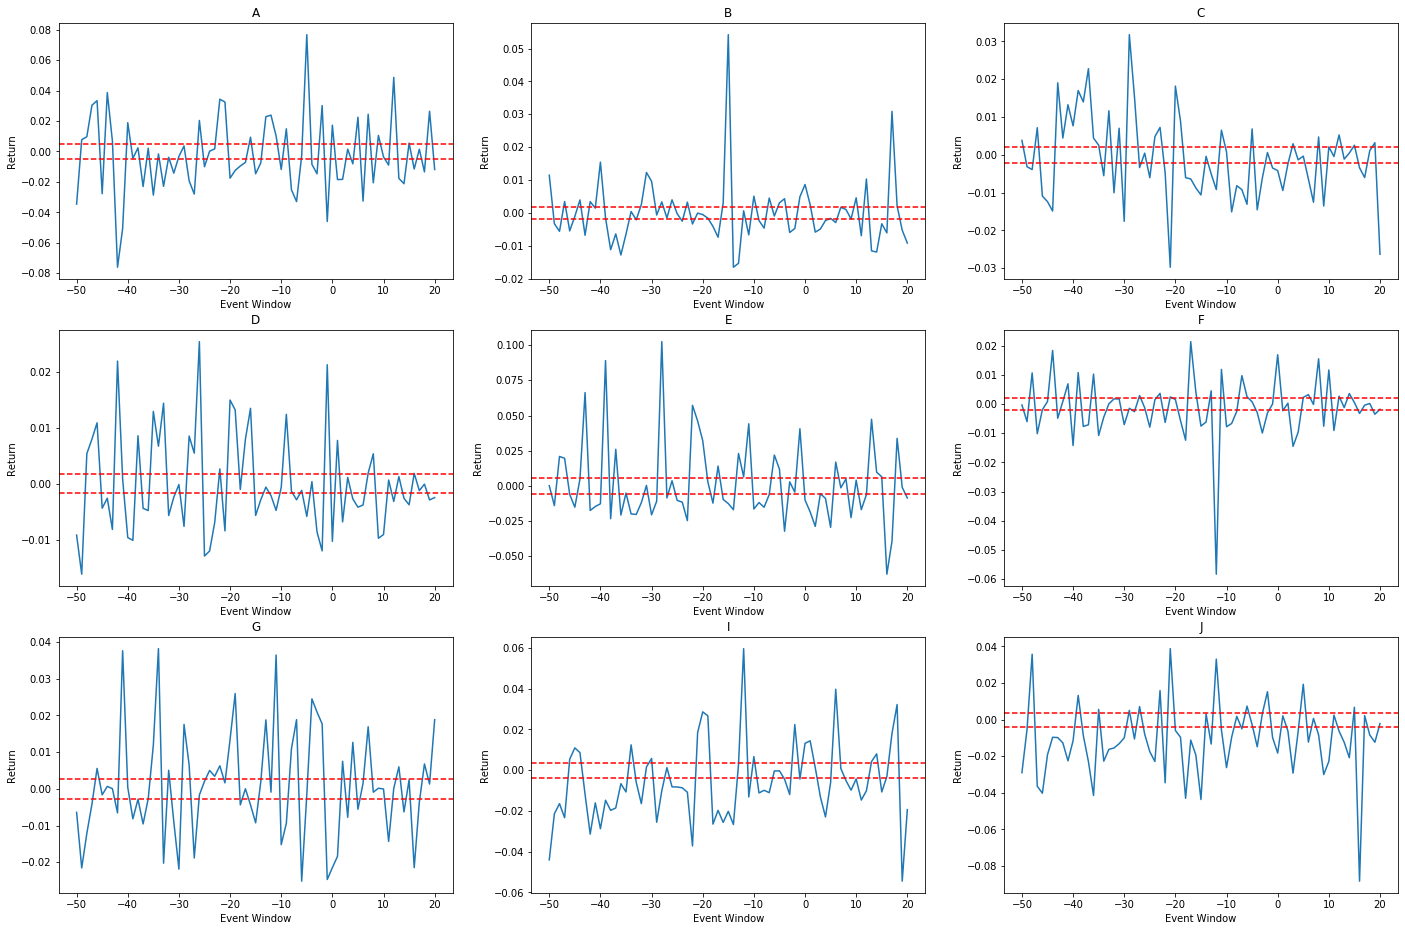

In [49]:
plt.figure(figsize=(24,16))
for i in range(1,10):
    plt.subplot(3,3,i)
    abnormalreturns_df[abnormalreturns_df.columns[i-1]].plot()
    plt.xlabel('Event Window')
    plt.ylabel('Return')
    plt.axhline(y=(np.sqrt((abnormalreturns_df.iloc[:,i-1].std()**2/(event_win*2+1)))*1.96),color='red',linestyle='--')
    plt.axhline(y=(np.sqrt((abnormalreturns_df.iloc[:,i-1].std()**2/(event_win*2+1)))*-1.96),color='red',linestyle='--')
    plt.title(abnormalreturns_df.columns[i-1])

Text(0.5, 0, 'date')

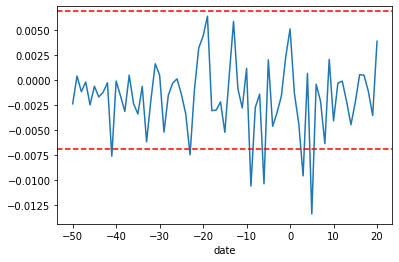

In [50]:
mean_AAR = abnormalreturns_df.mean(axis = 1)
var_AAR = (abnormalreturns_df.std())**2
var_matrix = pd.DataFrame(var_AAR)
var_matrix = var_matrix.T
var_AAR = sum(var_matrix.iloc[0])/49**2
Std_AAR = np.sqrt(var_AAR)
mean_AAR.plot()
plt.axhline(y=Std_AAR*1.96,color='red',linestyle='--')
plt.axhline(y=Std_AAR*-1.96,color='red',linestyle='--')
plt.xlabel('date')

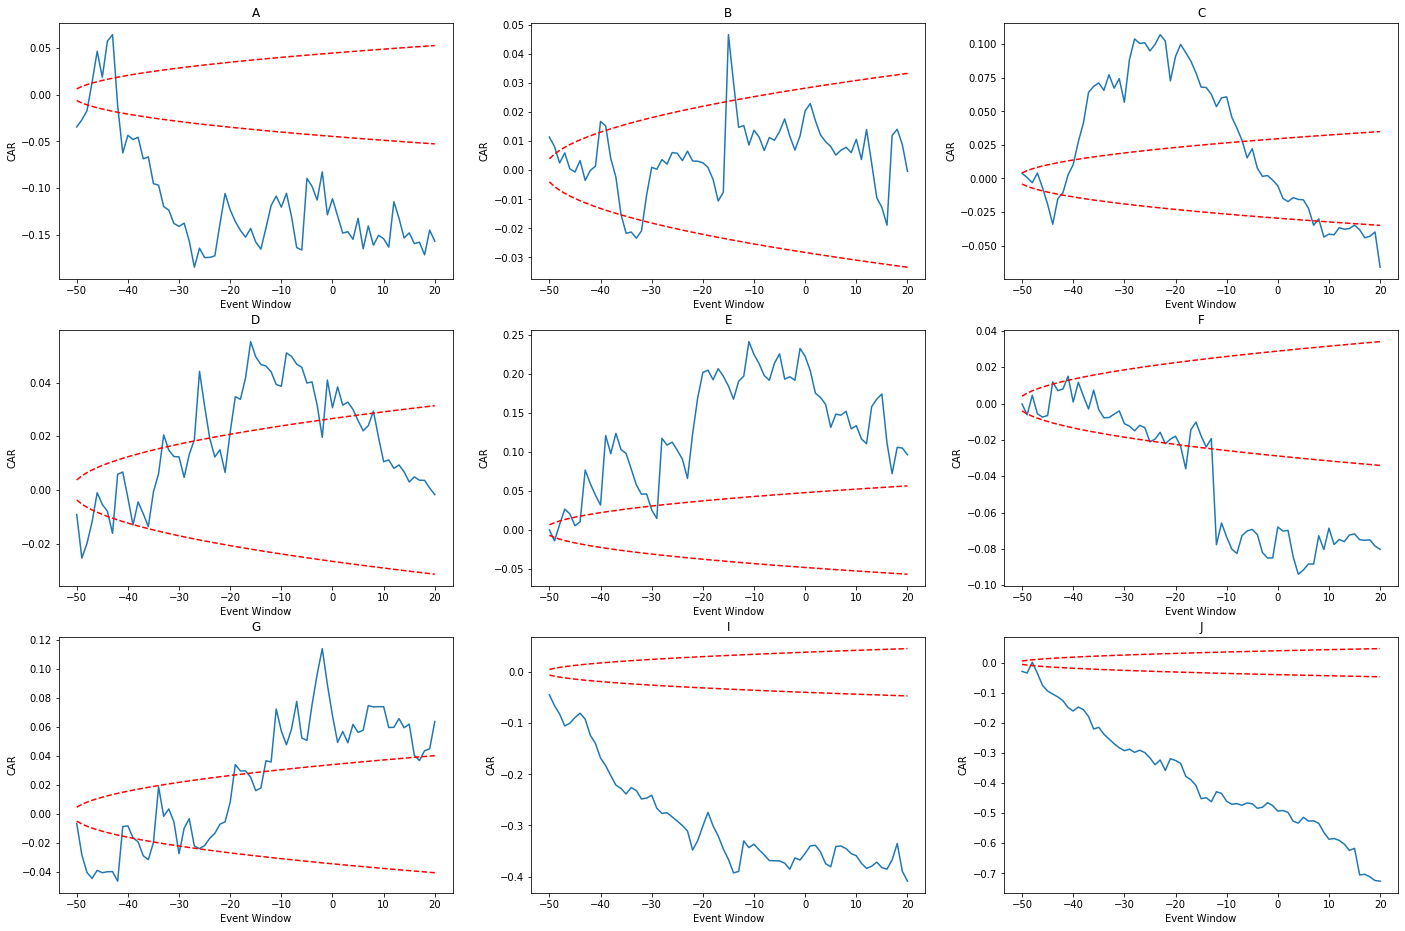

In [51]:
def CAR_se(Abnormal_return=abnormalreturns_df, stock_list=stocklist):
    """
    To get the standard error of Cumulative Abnormal Return for each stock
    Input: the Abnormal Return datafram or matrix, a list of company names
    Output: a dataframe of cumulative standard error for each stock
    """
    residual_sigma_single = pd.DataFrame()
    residual_sigma_cum_single = pd.DataFrame()
    resi_single = []
    d = {}
    for x in stocklist:
        resistd = abnormalreturns_df[x].std()/49
        d.update({x:resistd})
        
    residual_sigma_single = pd.DataFrame(d,index=Abnormal_return.index)
    residual_sigma_cum_single = np.sqrt(residual_sigma_single.cumsum())
    se_cum_single = np.sqrt(((residual_sigma_cum_single**2)/49))
    
    return se_cum_single

def CAAR_se(Abnormal_return=abnormalreturns_df, stock_list=stocklist):
    
    """
    To get the standard error of Cumulative Average Abnormal Return
    Input: the Abnormal Return datafram or matrix, a list of company names
    Output: a list of cumulative standard error
    """
    residual_sigma  = pd.DataFrame()
    resi = []
    d = {}
    for x in stocklist:
        resistd = abnormalreturns_df[x].std()/49
        d.update({x:resistd})
        
    residual_sigma = pd.DataFrame(d,index=Abnormal_return.index)
    residual_sigma_cum = np.sqrt(residual_sigma.cumsum())
    se_cum = np.sqrt(((residual_sigma_cum**2)/49).mean(axis=1))
    
    return se_cum

se_cum_single = CAR_se()
CAR_df = abnormalreturns_df.cumsum()
plt.figure(figsize=(24,16))
for i in range(1,10):
    plt.subplot(3,3,i)
    CAR_df[CAR_df.columns[i-1]].plot()
    plt.plot(se_cum_single.iloc[:,i-1]*1.96, color='red',linestyle='--')
    plt.plot(se_cum_single.iloc[:,i-1]*-1.96, color='red',linestyle='--')
    plt.xlabel('Event Window')
    plt.ylabel('CAR')
    plt.title(CAR_df.columns[i-1])


In [52]:
car_end = pd.DataFrame(CAR_df.iloc[-1,:])
car_end['ticknum'] = event_data.ticknum
car_end['tickname'] = event_data['tickname ']
car_end

,20,ticknum,tickname
A,-0.156893,603839.SH,安正时尚
B,-0.000348,601727.SH,上海电气
C,-0.066155,601390.SH,中国中铁
D,-0.001771,601186.SH,中国铁建
E,0.096237,600739.SH,辽宁成大
F,-0.080181,600704.SH,物产中大
G,0.063835,600549.SH,厦门钨业
I,-0.409057,600522.SH,中天科技
J,-0.725737,600380.SH,健康元
K,0.080995,600332.SH,白云山


In [53]:
car_end.to_csv('3.csv', encoding="utf_8_sig")

Text(0.5, 1.0, 'Cumulative Average Abnormal Return')

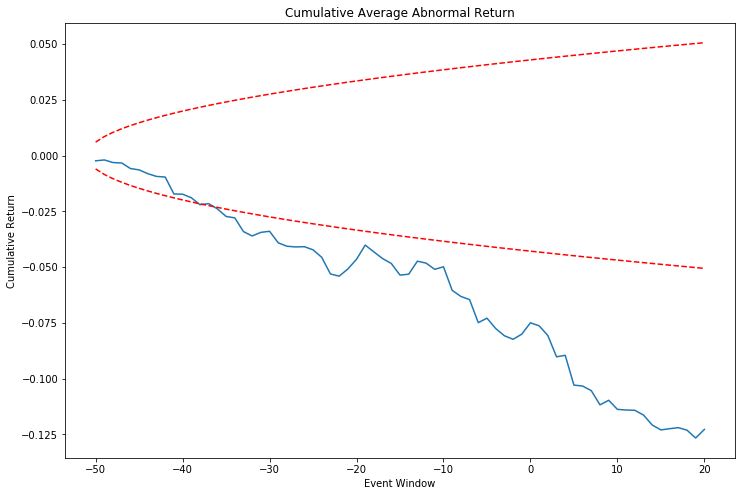

In [54]:
Var_AAR = ((CAR_df.mean(axis=1))**2)/49
Std_AAR = np.sqrt(Var_AAR)
se = CAAR_se()
# CAAR
CAAR = mean_AAR.cumsum()

# Plot CAAR
CAAR.plot(figsize=(12,8))
plt.xlabel("Event Window")
plt.plot(se*1.96, color='red',linestyle='--')
plt.plot(se*-1.96, color='red',linestyle='--')
plt.ylabel("Cumulative Return")
plt.title("Cumulative Average Abnormal Return")

In [55]:
tstat_list = []
pval_list = []
mean_list = []
se_list = []
for i in range(len(stocklist)):
    tstat, pval = ttest_ind(abnormalreturns_df.iloc[:,i], np.zeros(event_win*2+1))
    tstat_list.append(tstat)
    pval_list.append(pval)
    mean_list.append(np.mean(abnormalreturns_df.iloc[:,i]))
    se_list.append(np.std(abnormalreturns_df.iloc[:,i])/np.sqrt(event_win*2+1))
    

In [56]:
result = pd.DataFrame(index=stocknamelist)
result['mean'] = mean_list
result['se'] = se_list
result['t_statistics'] = tstat_list
result['p_value'] = pval_list
result

,mean,se,t_statistics,p_value
安正时尚,-0.002210,0.002412,-0.910984,3.635937e-01
上海电气,-0.000005,0.000968,-0.005030,9.959926e-01
中国中铁,-0.000932,0.001062,-0.872586,3.841197e-01
中国铁建,-0.000025,0.000856,-0.028976,9.769180e-01
辽宁成大,0.001355,0.002771,0.486218,6.274390e-01
物产中大,-0.001129,0.001008,-1.113510,2.670613e-01
厦门钨业,0.000899,0.001411,0.633278,5.274033e-01
中天科技,-0.005761,0.001865,-3.071258,2.482575e-03
健康元,-0.010222,0.001904,-5.336629,2.992379e-07
白云山,0.001141,0.001475,0.769153,4.428699e-01


In [57]:
ttest_ind(np.mean(abnormalreturns_df, axis=1), np.zeros(event_win*2+1))

Ttest_indResult(statistic=-4.817326747012323, pvalue=3.204060319447688e-06)

In [58]:
y = abnormalreturns_df.cumsum().iloc[-1,:]
X = dummy[['Non-SOE','GEM', 'Main', 'SME', 
           'Others', 'Industrial','Material','Healthcare','IT']]
X = sm.add_constant(X)
y = np.array(y)
reg = sm.OLS(y, X).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     1.531
Date:                Sun, 16 Jan 2022   Prob (F-statistic):              0.184
Time:                        23:00:37   Log-Likelihood:                 2.4376
No. Observations:                  49   AIC:                             11.12
Df Residuals:                      41   BIC:                             26.26
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0597      0.055     -1.080      0.2